In [1]:
print('NAME: SOMTO A. \nID:801215537 \nHW#: 0\nGITHUB: https://github.com/Somto-Dera/ECGR5090-Machine-Learning ')

"""
Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
"""

NAME: SOMTO A. 
ID:801215537 
HW#: 0
GITHUB: https://github.com/Somto-Dera/ECGR5090-Machine-Learning 


'\nCompute cost for linear regression.\n\n  Input Parameters\n  ----------------\n  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)\n      m= number of training examples\n      n= number of features (including X_0 column of ones)\n  y : 1D array of labels/target value for each traing example. dimension(1 x m)\n\n  theta : 1D array of fitting parameters or weights. Dimension (1 x n)\n\n  Output Parameters\n  -----------------\n  J : Scalar value.\n'

In [163]:
# Data Visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats
from scipy import stats

from sklearn.preprocessing import MinMaxScaler


# Ensure plots are displayed inline in the notebook
%matplotlib inline
from matplotlib import pyplot as plt

In [164]:
#Load the dataset from my workspace
dataset = pd.read_csv('D3.csv')
#Display dataset 
dataset

#M=len(hw1)
#M

,x1,x2,x3,y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [165]:
x1 = dataset.values[:, 0]  # get input values from first column
x2 = dataset.values[:, 1]  # get input values from second column
x3 = dataset.values[:, 2]  # get input values from third column
y = dataset.values[:, 3]   # get output values from fourth column
m = len(y) # Number of training examples
print('X1 = ', x1[:]) # Show all X1 - Explanatory Variables
print('X2 = ', x2[:]) # Show all X2 - Explanatory Variables
print('X3 = ', x2[:]) # Show all X3 - Explanatory Variables
print('y = ', y[:])   # Show all y - Dependent Variables 
print('m = ', m)      # Show number of data in dataset per row

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525253 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454545 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.50505051 2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474747 3.51515152 3.55555556 3.

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA data\nred is x1 | green is x2 | blue is x3')

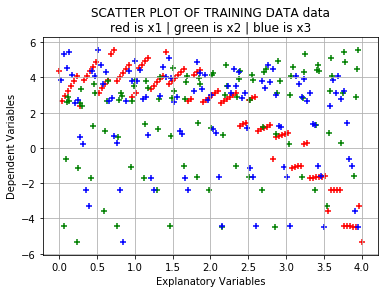

In [166]:
plt.scatter(x1,y, color='red',marker= '+')
plt.grid()
plt.scatter(x2,y, color='green',marker= '+')
plt.grid()
plt.scatter(x3,y, color='blue',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA data\nred is x1 | green is x2 | blue is x3')



In [167]:
#Lets create a matrix with single column of ones
X_0 = np.ones((m, 1))

X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)

# Lets use hstack() function from numpy to stack X_0 and X_1, X_2,X_3 horizontally (i.e. column wise) to make a single 2D array. 
# This will be our final X matrix (feature matrix)
X_1 = np.hstack((X_0, X_1))
X_2 = np.hstack((X_0, X_2))
X_3 = np.hstack((X_0, X_3))
#X[:]

#Initialise theta to zero
theta = np.zeros(2)

#Check the shape of theta
theta.shape

(2,)

In [168]:
def compute_cost(X, y, theta):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """

  predictions = X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  J = 1 / (2 * m) * np.sum(sqrErrors)

  return J


In [169]:
# Lets compute the cost for theta values
cost_x1 = compute_cost(X_1, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost_x1)
cost_x2 = compute_cost(X_2, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost_x2)
cost_x3 = compute_cost(X_3, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost_x3)


The cost for given values of theta_0 and theta_1 = 5.524438459185473
The cost for given values of theta_0 and theta_1 = 5.524438459185473
The cost for given values of theta_0 and theta_1 = 5.524438459185473


In [170]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, y)
    #print('errors= ', errors[:5])
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(X, y, theta)  

  return theta, cost_history

In [171]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.02;

In [172]:
theta, cost_history = gradient_descent(X_1, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.92048923 -2.03543328]
cost_history = [5.44159061 5.36931698 5.30525582 ... 0.98500031 0.98500025 0.98500018]


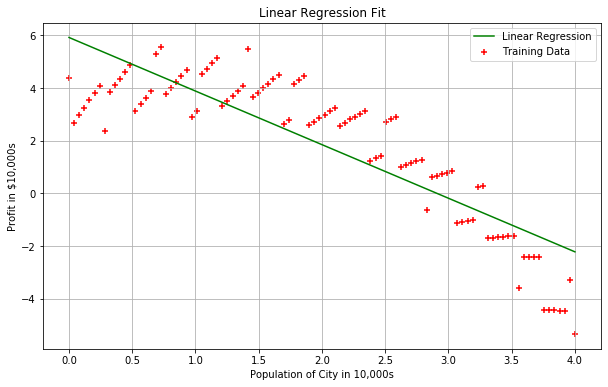

In [173]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

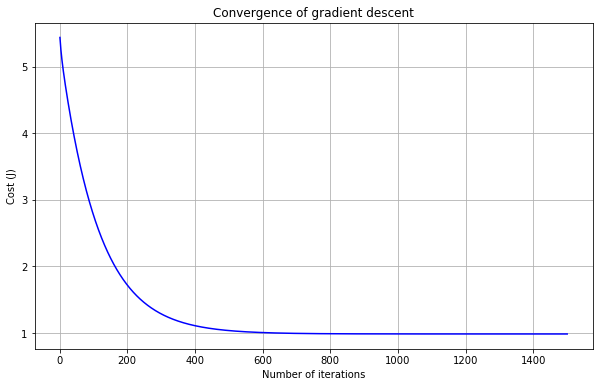

In [174]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [175]:
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, our prediction of profit is", predict1 * 10000)

predict2 = np.array([1, 7]).dot(theta)
print("For population = 70,000, our prediction of profit is", predict2 * 10000)

For population = 35,000, our prediction of profit is -12035.272676336639
For population = 70,000, our prediction of profit is -83275.43761982291
